In [1]:
import statsmodels.api as sm
from scipy import stats      #used in the implementation of the necesary tests we need to perform 
import researchpy as rp      #can also  be use in the implementation of the necessary tests

from sklearn.preprocessing import scale 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

%matplotlib inline

In [2]:
#import the bike sharing dataset 

<h3> Using the T-test to know if 'working day' truely affects the amount of bikes rented </h3>

In [3]:
df_bike = pd.read_csv('python/hypothesis testing/02/demos/datasets/bike_sharing_data_processed.csv')

In [4]:
df_bike.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


<H4> Let us explore our variables </h4>

In [5]:
df_bike['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
#from the above, 1 represents spring, 2: summer, 3: Fall, 4: Winter

In [7]:
df_bike['workingday'].unique()

array([0, 1], dtype=int64)

In [8]:
# where 1:working day, 2: not working day

In [9]:
df_bike['holiday'].unique()

array([0, 1], dtype=int64)

In [10]:
# where 0: no holiday, 1: holiday 

In [11]:
df_bike['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [12]:
# weathersit represent the weather situation where
#2: Misty cloud, 3: Light snow, rain, thunder storm, 1: clear, few clouds 

In [13]:
#temperature is continous and we can use the describe function to understand its statistical distribution 
df_bike['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [14]:
#what is the shape of the dataset 
df_bike.shape

(731, 7)

<H2> When doing hypothesis testing, the variables you are working with can either be categorical or continous </h2>

<h3> Remember we use the T-test to compare the differences in means between two samples of a population and see if their difference is statistically significant </h3>

<H3> First task: See if the average number of bikes rented on a working day vs non-working day are different </h3>

In [15]:
df_bike.groupby(['workingday'])['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<h3> NOTE: In order to perform T-test, the sample have to be of equal sizes </h3> 
<h3> Split the samples </h3>

In [16]:
sample_01 = df_bike[df_bike['workingday'] == 0]
sample_02 = df_bike[df_bike['workingday'] == 1]

In [17]:
#check their shapes 
sample_01.shape, sample_02.shape 

((231, 7), (500, 7))

In [18]:
#we can visualize the means of the two sample

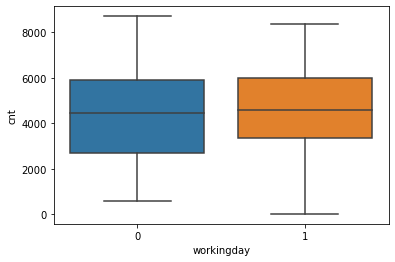

In [19]:
sns.boxplot(df_bike['workingday'], df_bike['cnt']);

In [20]:
#in order to make sample_02 equal to sample_01, we use the sample function 
sample_2 = sample_02.sample(231)

In [21]:
#check their shapes again
sample_01.shape, sample_2.shape

((231, 7), (231, 7))

<h3> NOTE: Before performing the T-test, you need to make sure that the assumptions that are made for the T-test are satisfied </h3>

<h3> Use the Levene Test - to know if the Variances of the two sampes are the same or not </h3>
<h3> The NUll hypothesis test for levene's test is that the variances are the same for both samples. the Alternative hypothesis is that the variances are different </h3>

In [25]:
#Apply the levene's test 

stats.levene(sample_01['cnt'], sample_2['cnt'])

LeveneResult(statistic=7.974414373371433, pvalue=0.004950302107818851)

In [24]:
#from the above, we will accept the null hypothesis since the p-value is greater than 0.05 i.e. the variances are not so 
#different. Therefore, we will use the Independent T-test

<h3> Next is to check if the residual of the two dataset are normally distributed </h3> 

In [30]:
residue = scale(np.array(sample_01['cnt'] - np.array(sample_2['cnt'])))

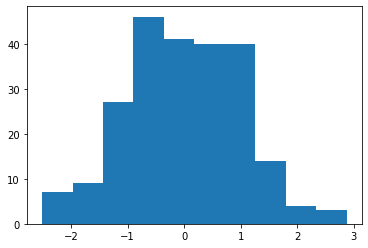

In [32]:
plt.hist(residue);

In [28]:
residue = scale(np.array(sample_01['cnt'])  - np.array(sample_2['cnt']))

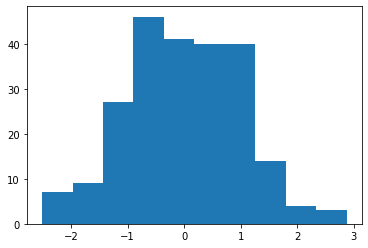

In [29]:
plt.hist(residue);

In [34]:
stats.shapiro(residue)

(0.9937366843223572, 0.44650447368621826)

<H3> Below is a probabilty plot using the Q-Q plot </h3>
<H4> The Idea behind a Q-Q plot is that majority if not all of the the blue dots are scattered along the red lines (i.e. quartile  lines) </h4>

<Figure size 576x432 with 0 Axes>

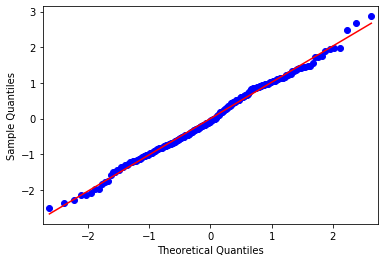

In [39]:
plt.figure(figsize = (8, 6));
sm.qqplot(residue, line = 'r');
plt.show();

<h3> Another way to perform qqplot can be seeen below </h3>

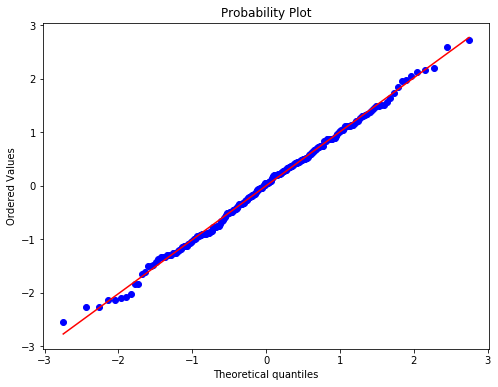

In [30]:
plt.figure(figsize = (8, 6))
stats.probplot(residue, plot = plt, dist = 'norm')
plt.show()

<h3> Below we are performing the independent T-test using the researchpy library </h3> 

In [42]:
description, result =rp.ttest(sample_01['cnt'], sample_2['cnt'], group1_name = 'weekend', group2_name = 'weekday')

In [43]:
print(description)

   Variable      N         Mean           SD          SE    95% Conf.  \
0   weekend  231.0  4330.168831  2052.141245  135.020981  4064.132702   
1   weekday  231.0  4505.047619  1795.145905  118.111929  4272.327932   
2  combined  462.0  4417.608225  1927.826694   89.690615  4241.355115   

      Interval  
0  4596.204960  
1  4737.767306  
2  4593.861335  


In [45]:
print(result)

                  Independent t-test   results
0  Difference (weekend - weekday) =  -174.8788
1              Degrees of freedom =   460.0000
2                               t =    -0.9748
3           Two side test p value =     0.3301
4          Difference < 0 p value =     0.1651
5          Difference > 0 p value =     0.8349
6                       Cohen's d =    -0.0907
7                       Hedge's g =    -0.0906
8                   Glass's delta =    -0.0852
9                               r =     0.0454


<h3> Method 2 </h3

In [46]:
stats.ttest_ind(sample_01['cnt'], sample_2['cnt'])

Ttest_indResult(statistic=-0.9748476261835205, pvalue=0.3301482066010891)

<h3> Conclusion </h3>

<h2> Given that the p-value is at least 0.05, it is safe to say that the number of bikes shared is not dependent on if it is a working day or not </h2>

<h2> Given the P-value of 0.331, we do not have sufficient evidence to reject the Null hypothesis </h2> 